<a href="https://colab.research.google.com/github/TZstatsADS/ads-spring2023-project1-ArnulfoTrevino/blob/main/Project1ADSAAT2209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The happydb database is a dataframe of over 100,000 answers in order to answer “What made you happy today?”. In order for us to understand happiness, common words, how it is distributed by demographics, and the sentiment of the wording we decided to analyze the data and come up with several conclusions.

### **Initial Code**

In [ ]:
!git clone https://github.com/TZstatsADS/ads-spring2023-project1-ArnulfoTrevino.git


fatal: destination path 'ads-spring2023-project1-ArnulfoTrevino' already exists and is not an empty directory.


In [ ]:
!ls ads-spring2023-project1-ArnulfoTrevino

data  doc  figs  lib  output  Project1ADSAAT2209.ipynb	README.md


Import libraries and have databases ready

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter


#Import libraries and have databases
happydb = pd.read_csv('/content/ads-spring2023-project1-ArnulfoTrevino/data/cleaned_hm.csv')
demographic_df = pd.read_csv('/content/ads-spring2023-project1-ArnulfoTrevino/data/demographic.csv')
original_hm_df = pd.read_csv('/content/ads-spring2023-project1-ArnulfoTrevino/data/original_hm.csv')
senselabel_df = pd.read_csv('/content/ads-spring2023-project1-ArnulfoTrevino/data/senselabel.csv')
vad_df = pd.read_csv('/content/ads-spring2023-project1-ArnulfoTrevino/data/vad.csv')


Review info in db

In [ ]:

happydb.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection


# MOST COMMON WORDS AND PHRASES IN THE HAPPY MOMENTS




This will be a pie chart of the most common words and phrases used in happy moments in order to understand what are the most common happy moments people go through

In [ ]:
#Have stopwords in order to avoid "a", "but", etc and also clean the db
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
happydb['tokens'] = happydb['original_hm'].str.lower().apply(word_tokenize).apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Get the top 10 most common words

In [ ]:
all_words = [word for tokens in happydb['tokens'] for word in tokens]
word_counts = Counter(all_words)

most_common_words = word_counts.most_common(10)
print(most_common_words)


[('happy', 18705), ('got', 13378), ('made', 11419), ('went', 9613), ('time', 9252), ('new', 8867), ('day', 8021), ('work', 7846), ('last', 6372), ('friend', 6117)]


Get the top 10 most common phrases

In [ ]:
bigrams = nltk.bigrams(all_words)
bigram_counts = Counter(bigrams)

most_common_bigrams = bigram_counts.most_common(10)
print(most_common_bigrams)


[(('made', 'happy'), 5186), (('last', 'night'), 1982), (('first', 'time'), 1783), (('long', 'time'), 1287), (('event', 'made'), 1146), (('last', 'week'), 1070), (('last', 'month'), 1056), (('bought', 'new'), 1001), (('felt', 'happy'), 985), (('got', 'new'), 981)]


Graph the top 10 words

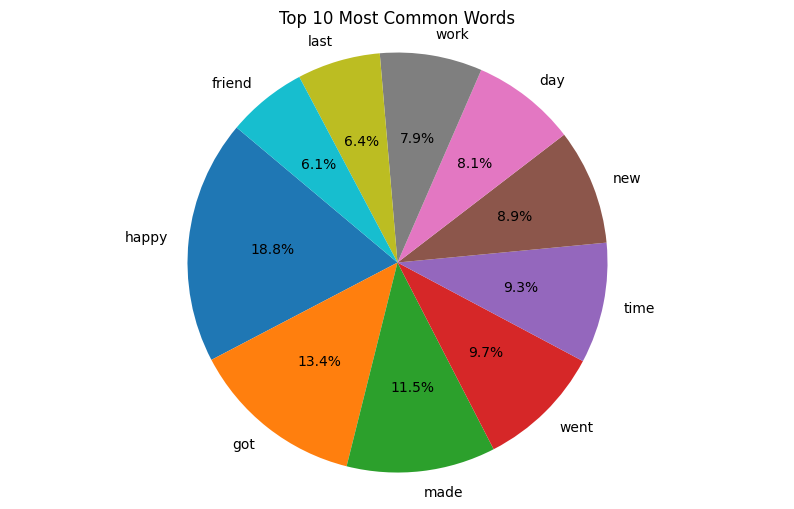

<Figure size 640x480 with 0 Axes>

In [ ]:
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.pie(counts, labels=words, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 10 Most Common Words')
plt.show()
plt.savefig('MCWPart1.jpg')

Graph the top 10 phrases

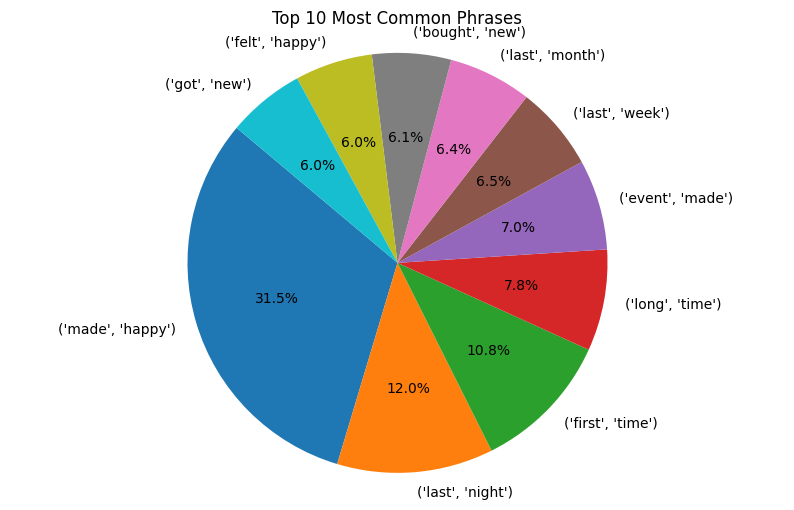

<Figure size 640x480 with 0 Axes>

In [ ]:
words, counts = zip(*most_common_bigrams)

plt.figure(figsize=(10, 6))
plt.pie(counts, labels=words, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 10 Most Common Phrases')
plt.show()
plt.savefig('MCPPart1.jpg')

Adjust stop words in order to eliminate 2 words that may be misleading

In [ ]:
stop_words = set(stopwords.words('english'))
custom_stopwords = ['felt','last']
stop_words.update(custom_stopwords)

happydb['tokens'] = happydb['original_hm'].str.lower().apply(word_tokenize).apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])

all_words = [word for tokens in happydb['tokens'] for word in tokens]
word_counts = Counter(all_words)

most_common_words = word_counts.most_common(10)
print(most_common_words)

bigrams = nltk.bigrams(all_words)
bigram_counts = Counter(bigrams)

most_common_bigrams = bigram_counts.most_common(10)
print(most_common_bigrams)


[('happy', 18705), ('got', 13378), ('made', 11419), ('went', 9613), ('time', 9252), ('new', 8867), ('day', 8021), ('work', 7846), ('friend', 6117), ('good', 5840)]
[(('made', 'happy'), 5189), (('first', 'time'), 1783), (('long', 'time'), 1287), (('event', 'made'), 1146), (('bought', 'new'), 1001), (('got', 'new'), 981), (('best', 'friend'), 785), (('happiest', 'moment'), 782), (('feel', 'happy'), 775), (('really', 'happy'), 761)]


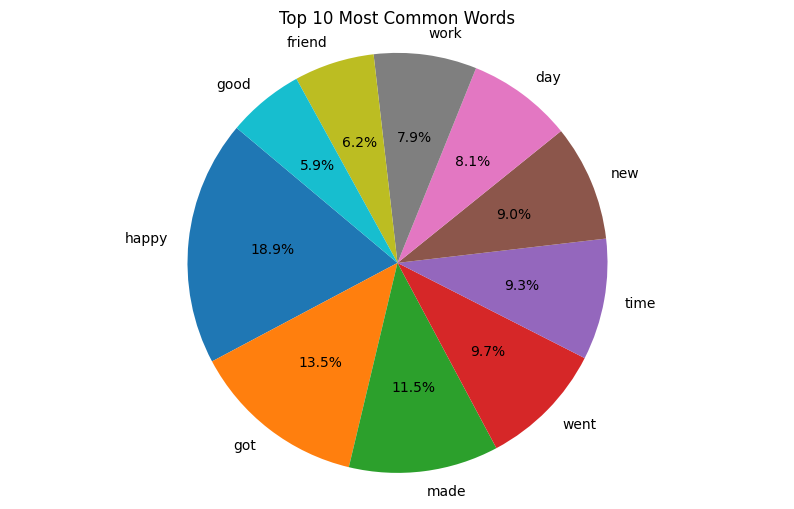

<Figure size 640x480 with 0 Axes>

In [ ]:
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.pie(counts, labels=words, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 10 Most Common Words')
plt.show()
plt.savefig('MCWPart2.jpg')

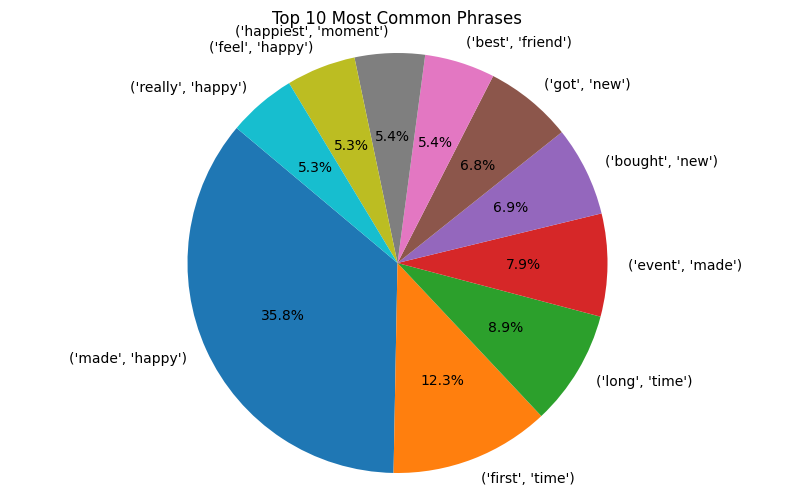

<Figure size 640x480 with 0 Axes>

In [ ]:
words, counts = zip(*most_common_bigrams)

plt.figure(figsize=(10, 6))
plt.pie(counts, labels=words, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 10 Most Common Phrases')
plt.show()
plt.savefig('MCPPart2.jpg')

The most common words that where include where "got","made", "new" and many more. This 3 where crucial in understanding that possession material is critical for happiness in the human being. The most common phrases included words such as:('got','new'), ('bought','new'), ('long','time'), ('first','time')

These words and phrases also helped understanding that the majority of people were happy when they did something they haven't done in a long time or if it was something they did for the first time.

In this case, analyzing data within the most common words I found that "felt" and "last" were there. I did not find them helpful in order to find a pattern since they were in phrases such as ("felt", "happy") and ("last","night") or ("last","month"). These phrases for me were irrelevant into the analysis and therefore I decided to remove them which helped find other interesting conclusions within the db.

# DEMOGRAPHICS

Find all columns of demographic dataframe

In [ ]:
demographic_df.head()

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n
3,4,32,USA,m,married,y
4,5,29,USA,m,married,y


Create a graph of countries that inputed happy moments

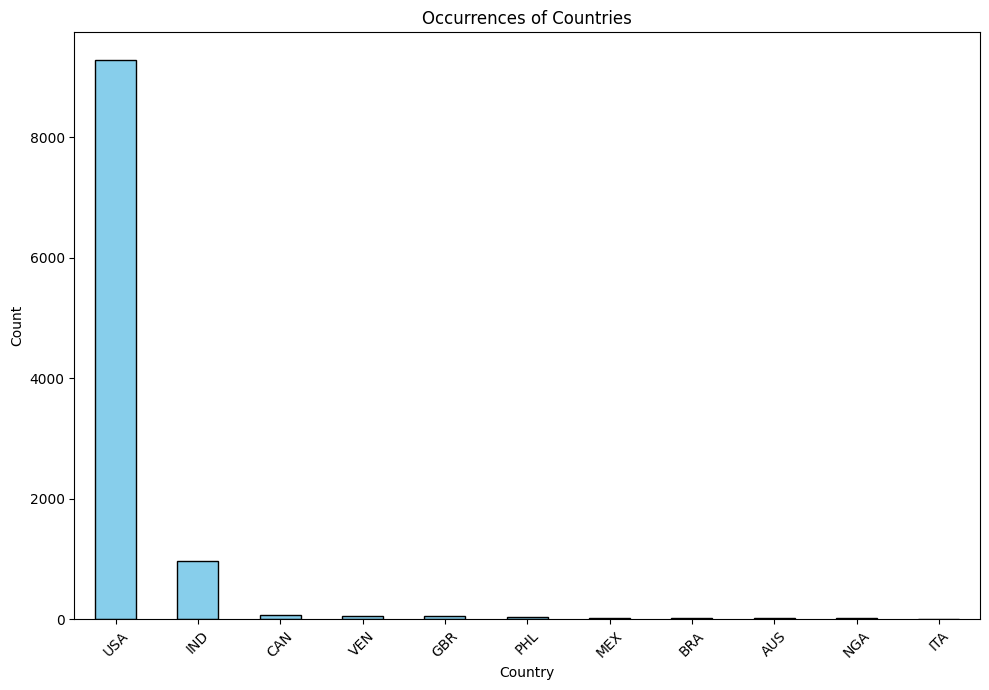

<Figure size 640x480 with 0 Axes>

In [ ]:
country_counts = demographic_df['country'].value_counts()
filtered_counts = country_counts[country_counts > 10]
plt.figure(figsize=(10, 7))
filtered_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Occurrences of Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('CountriesHappy.jpg')

Divided happy moments by gender

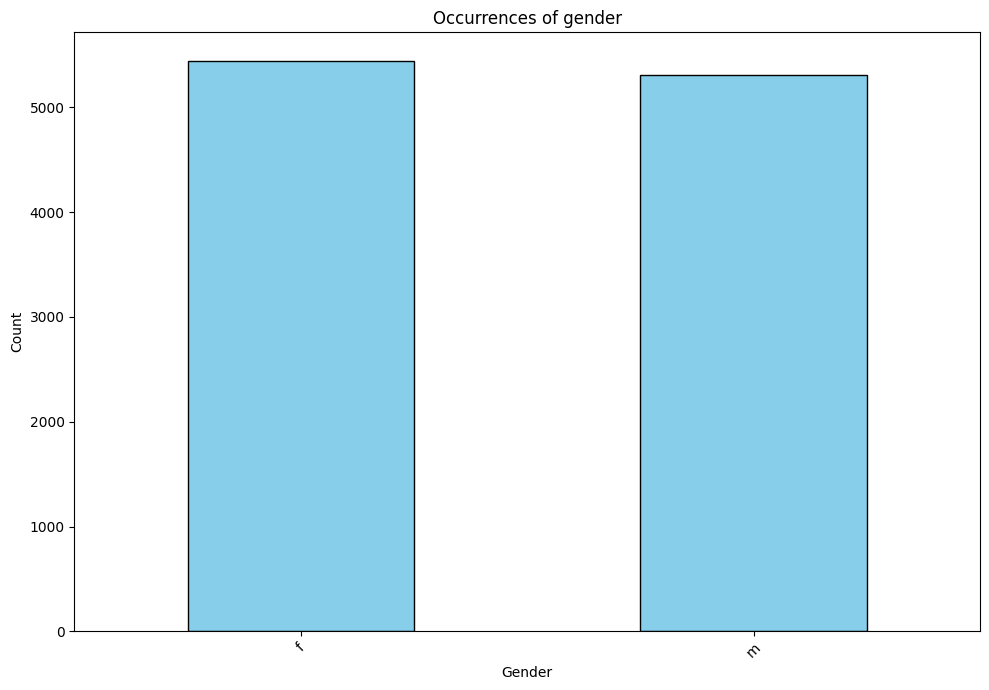

<Figure size 640x480 with 0 Axes>

In [ ]:
country_counts = demographic_df['gender'].value_counts()
filtered_counts = country_counts[country_counts > 1000]
plt.figure(figsize=(10, 7))
filtered_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Occurrences of gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('GenderHappy.jpg')

Divided happy moments by marital status

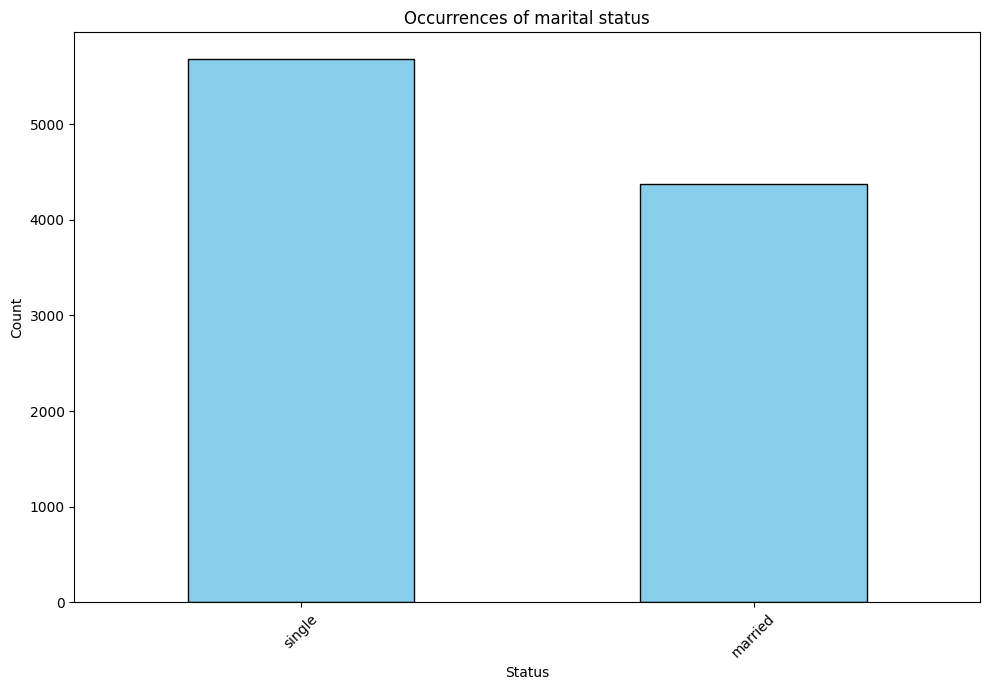

<Figure size 640x480 with 0 Axes>

In [ ]:
country_counts = demographic_df['marital'].value_counts()
filtered_counts = country_counts[country_counts > 1000]
plt.figure(figsize=(10, 7))
filtered_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Occurrences of marital status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('StatusHappy.jpg')

Divided happy moments by status of parenting

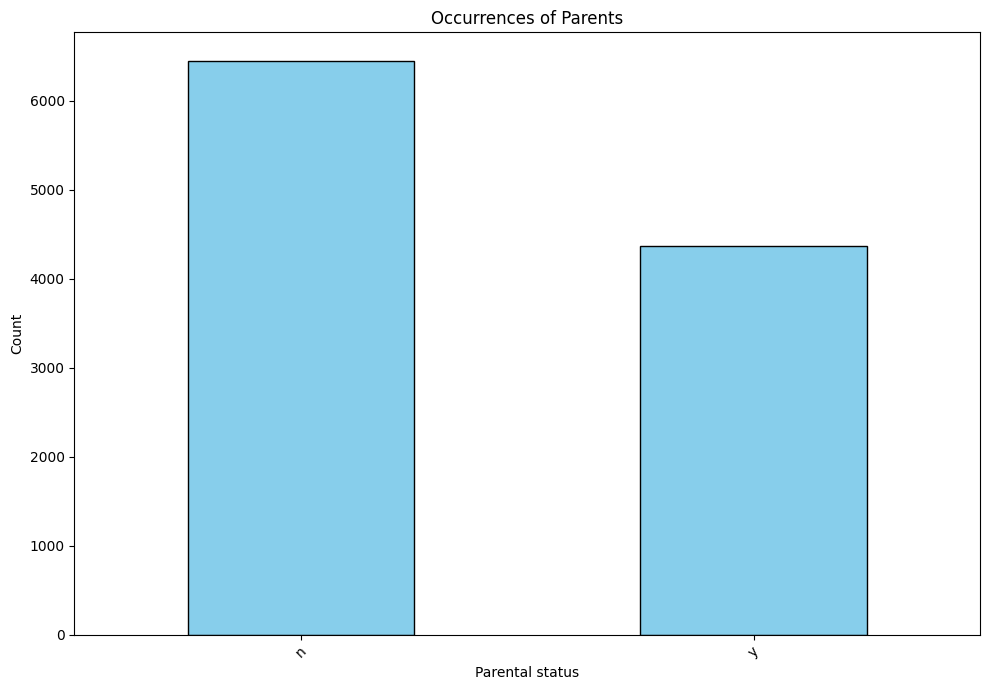

<Figure size 640x480 with 0 Axes>

In [ ]:
country_counts = demographic_df['parenthood'].value_counts()
filtered_counts = country_counts[country_counts > 1000]
plt.figure(figsize=(10, 7))
filtered_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Occurrences of Parents')
plt.xlabel('Parental status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('ParentsHappy.jpg')

Divided happy moments by age group(every 10 yrs)

<ipython-input-29-6082f484beeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_df['age'] = demographic_df['age'].astype(int)
<ipython-input-29-6082f484beeb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_df['age_group'] = (demographic_df['age'] // 10) * 10


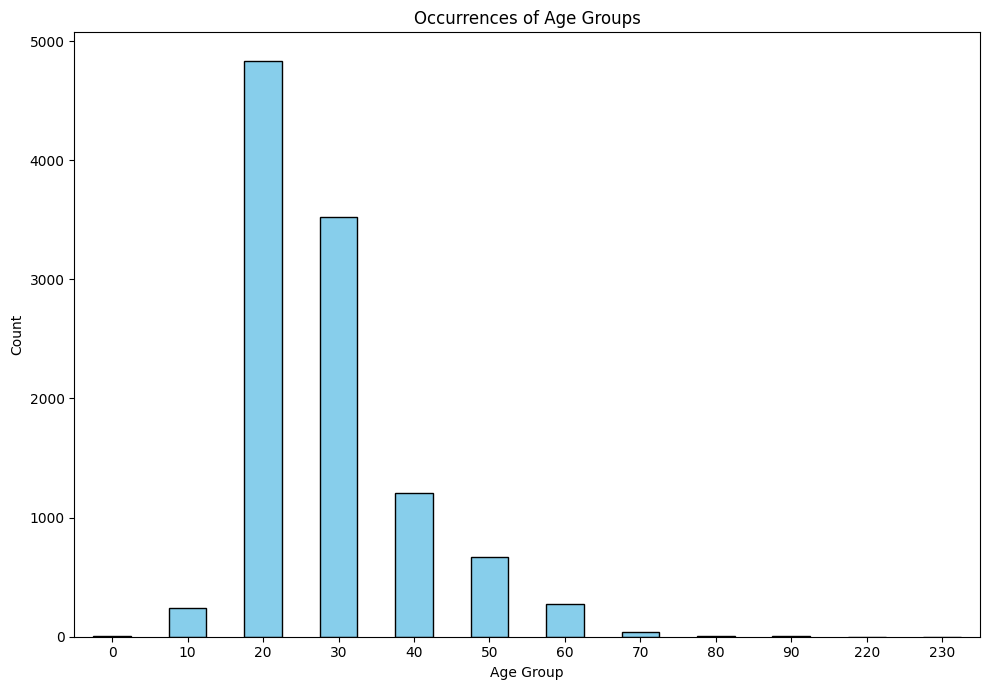

<Figure size 640x480 with 0 Axes>

In [ ]:
demographic_df['age'] = pd.to_numeric(demographic_df['age'], errors='coerce')
demographic_df = demographic_df.dropna(subset=['age'])
demographic_df['age'] = demographic_df['age'].astype(int)
demographic_df['age_group'] = (demographic_df['age'] // 10) * 10

age_group_counts = demographic_df['age_group'].value_counts().sort_index()

plt.figure(figsize=(10, 7))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Occurrences of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
plt.savefig('AgeGroup.jpg')

In the analysis of distribution by demographics I decided to create a graph for each individual column in order to divide them. As shown in the first image, you can find that the majority were from the US, later we can look and see that it is very similar in terms of female and male that answered the questions. In terms of parental and marital status we can find that the majority of responders were not parents and also single. Finally, in the age groups we can see that the majority of people who responded were between their 20's and 30's.

# SENTIMENT OF HAPPY MOMENTS

Use sentiment intensity analyzer from library in order to see how the cleaned version of the data was talking

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


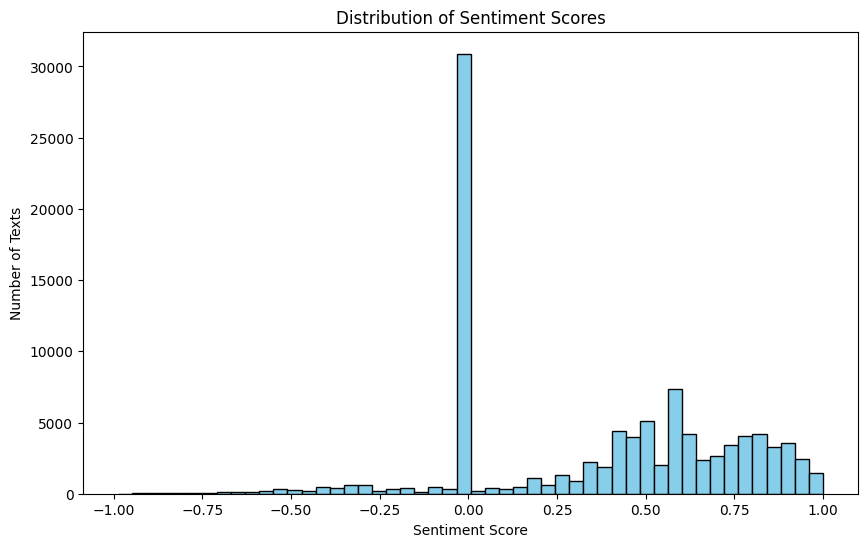

<Figure size 640x480 with 0 Axes>

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
happydb['sentiment'] = happydb['cleaned_hm'].apply(lambda x: sia.polarity_scores(x)['compound'])
plt.figure(figsize=(10, 6))
plt.hist(happydb['sentiment'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Texts')
plt.show()
plt.savefig('Sentiments.jpg')



Using the sentiment library we were available to understand how the words used in the sentences answered by the responders looked like. These library looks at the emotional tone in order to understand.

As seen in the image we can find the grand majority to of course have a positive sentiment with most being pretty high. Something astonishing found was that many sentiments were found neutral and it may have been because words where not clear enough in order for the library to get findings out of what was expressed.


# Conclusion


The happydb database offered a rich understanding of what makes people happy, helping us understand that material possession is still something people feel enjoyment, understanding the demographics of those who gave their answer, finding that a younder audience was more participant and finally seeing that even though more analysis in sentiment on wording was found positive than negative, you could see that the majority of the wording was neutral in terms of how people expressed their day
